In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.datasets import mnist

AttributeError: module 'tensorflow.python.pywrap_tensorflow' has no attribute '__version__'

In [21]:
(x_tr,y_tr),(x_te,y_te)=mnist.load_data()
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

NameError: name 'mnist' is not defined

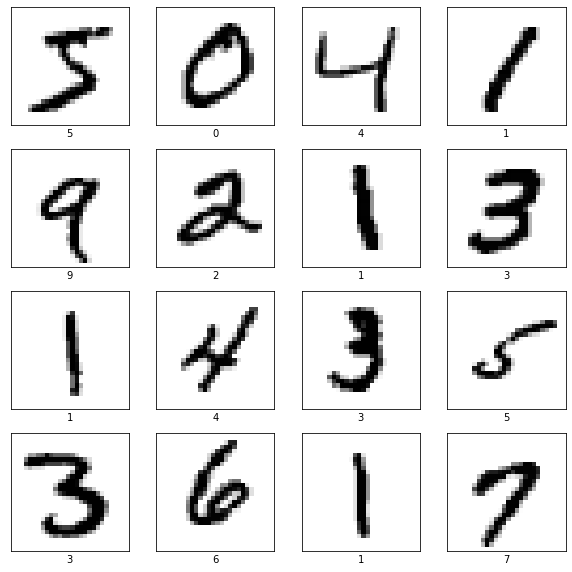

In [4]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_tr[i],cmap=plt.cm.binary)
    plt.xlabel(y_tr[i])
plt.show()

In [5]:
x_tr=x_tr[:50000,:,:]
x_te=x_te[:10000,:,:]
y_tr=y_tr[:50000]
y_te=y_te[:10000]
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(50000, 28, 28)
(10000, 28, 28)
(50000,)
(10000,)


In [6]:
x_tr=x_tr.reshape(50000,28,28,1)
x_te=x_te.reshape(10000,28,28,1)

x_tr=x_tr/255
x_te=x_te/255

print(x_tr.shape)
print(x_te.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
m1=Sequential()
m1.add(Conv2D(64,(3,3),strides=1,activation='relu',input_shape=(28,28,1)))
m1.add(MaxPooling2D(pool_size=(2,2),strides=2))
m1.add(Conv2D(64,(3,3),strides=1,activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2),strides=2))
m1.add(Flatten())
m1.add(Dense(64,activation='relu')) 
m1.add(Dense(10,activation='softmax'))
m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

2022-04-17 16:24:06.802992: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
h1=m1.fit(x_tr,y_tr,epochs=5,validation_data=(x_te,y_te))

Epoch 1/5
1563/1563 [==============================] - 50s 31ms/step - loss: 0.1546 - accuracy: 0.9525 - val_loss: 0.0606 - val_accuracy: 0.9804
Epoch 2/5
1563/1563 [==============================] - 49s 31ms/step - loss: 0.0496 - accuracy: 0.9842 - val_loss: 0.0411 - val_accuracy: 0.9859
Epoch 3/5
1563/1563 [==============================] - 51s 33ms/step - loss: 0.0327 - accuracy: 0.9895 - val_loss: 0.0358 - val_accuracy: 0.9885
Epoch 4/5
1563/1563 [==============================] - 50s 32ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0421 - val_accuracy: 0.9871
Epoch 5/5
1563/1563 [==============================] - 50s 32ms/step - loss: 0.0200 - accuracy: 0.9932 - val_loss: 0.0412 - val_accuracy: 0.9869


In [9]:
r1=pd.DataFrame(h1.history)
r1['Epochs']=h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
0,0.154577,0.95246,0.060617,0.9804,0
1,0.049589,0.98424,0.041105,0.9859,1
2,0.032679,0.98954,0.035755,0.9885,2
3,0.024869,0.99200,0.042054,0.9871,3
4,0.020024,0.99320,0.041187,0.9869,4


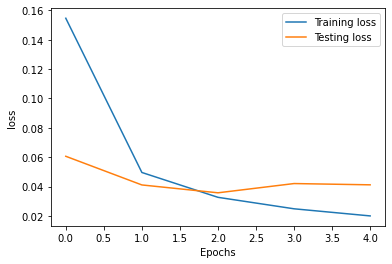

In [10]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

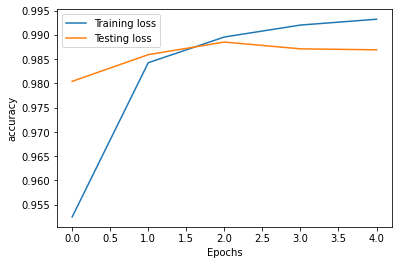

In [11]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training loss')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing loss')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [12]:
ypred_m1=m1.predict(x_te)
print(ypred_m1)

[[1.5612409e-10 4.4366932e-09 1.6093099e-07 ... 9.9999988e-01
  5.2484206e-10 3.6925314e-08]
 [4.4773343e-10 2.1179970e-08 1.0000000e+00 ... 3.9914003e-11
  2.9221278e-10 1.2197218e-13]
 [1.8562370e-10 9.9999940e-01 4.2410967e-11 ... 5.7335490e-07
  3.0879171e-10 3.2707492e-09]
 ...
 [4.6918811e-15 1.1775120e-09 3.5423588e-16 ... 6.6607803e-11
  2.6885985e-10 4.6323156e-10]
 [3.3604872e-10 5.7716249e-12 8.3986214e-13 ... 4.3088336e-13
  5.1295956e-05 1.4654087e-09]
 [5.1451742e-12 1.7404511e-14 7.7838701e-11 ... 1.6235858e-17
  8.7546116e-11 1.9835599e-14]]


In [13]:
ypred_m1=[np.argmax(i) for i in ypred_m1]
print(ypred_m1)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [14]:
cm=confusion_matrix(y_te,ypred_m1)
print(cm)
print(classification_report(y_te,ypred_m1))

[[ 959    1    0    0    4    0   11    3    0    2]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   1    2 1015    2    2    0    1    9    0    0]
 [   0    0    0 1007    0    1    0    0    2    0]
 [   0    1    0    0  979    0    1    0    0    1]
 [   1    1    0   13    0  866    9    1    1    0]
 [   0    2    0    0    1    0  955    0    0    0]
 [   0    8    1    0    0    0    0 1018    0    1]
 [   1    1    2    3    3    0    6    3  952    3]
 [   0    4    0    1    9    4    0    4    3  984]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       0.98      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.97      0.98       892
           6       0.97      1.00      0.98       958
           7       0.98      0.99   

In [15]:
m1.save('digit_recognizer.h5')

In [16]:
from tensorflow.keras.models import load_model

In [17]:
model = load_model('digit_recognizer.h5')